# Initialisation

In [ ]:
# Importer les réseaux .gml à partir de mon Drive

# Lecture du drive
from google.colab import drive
drive.mount('/content/drive')

# Importations
import networkx as nx
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import math
from abc import ABC
from abc import abstractmethod
import progressbar
import random
import torch
from tabulate import tabulate

# Tests
G = nx.read_gml('/content/drive/MyDrive/fb100/data/Caltech36.gml')
print(G.number_of_nodes())

data_dir = "/content/drive/MyDrive/fb100/data"


Mounted at /content/drive
769


# Importation des 3 premiers graphes

In [ ]:
# Importer les 3 graphes Caltech36, MIT8, Johns Hopkins55
G_caltech = nx.read_gml('/content/drive/MyDrive/fb100/data/Caltech36.gml', label='id')
G_mit = nx.read_gml('/content/drive/MyDrive/fb100/data/MIT8.gml', label='id')
G_jhu = nx.read_gml('/content/drive/MyDrive/fb100/data/Johns Hopkins55.gml', label='id')

# Question 2

## Question 2.a

In [ ]:
# Obtenir la distribution de degrés
def get_degree_distribution(G):
    degrees = [d for n, d in G.degree()]
    return degrees

# Tracer la distribution de degrés
def plot_degree_distribution(G, title):
    degrees = get_degree_distribution(G)
    plt.hist(degrees, bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Degree Distribution - {title}')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# On tente aussi une fonction loglog
def plot_loglog_degree(G, title):
    degrees = get_degree_distribution(G)
    plt.figure()
    plt.hist(degrees, bins=100, log=True)
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Degree Distribution (log-log) - {title}')
    plt.xlabel('Degree (log scale)')
    plt.ylabel('Frequency (log scale)')
    plt.grid(True)
    plt.show()


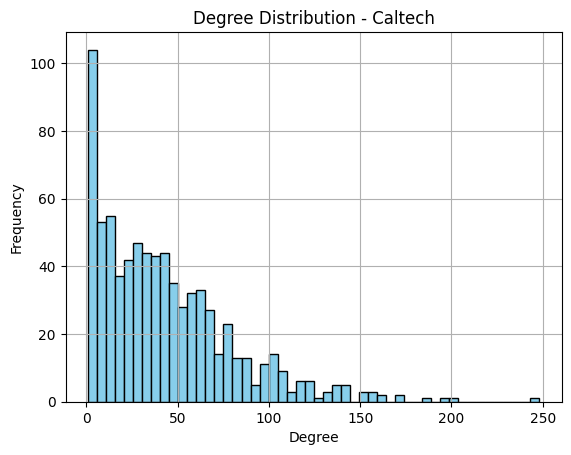

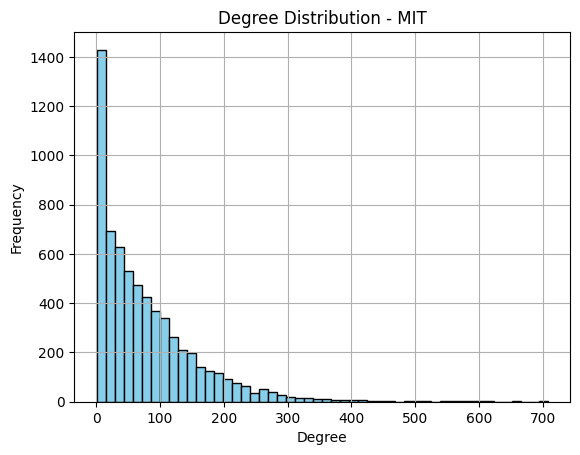

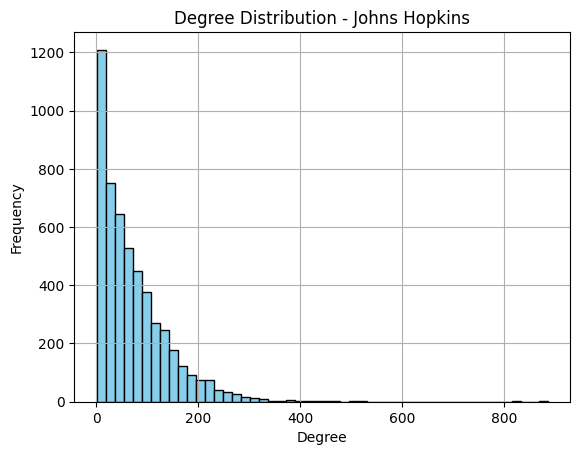

In [ ]:
# On trace les 3 graphes
plot_degree_distribution(G_caltech, "Caltech")
plot_degree_distribution(G_mit, "MIT")
plot_degree_distribution(G_jhu, "Johns Hopkins")

# plot_loglog_degree(G_caltech, 'Caltech')
# plot_loglog_degree(G_mit, 'Caltech')
# plot_loglog_degree(G_jhu, 'Caltech')


## Question 2.b

In [ ]:
# Une fonction qui calcule toutes les données demandés d'un graphe donné
def compute_metrics(G):
    global_clustering = nx.transitivity(G)  # clustering global
    mean_local_clustering = nx.average_clustering(G)  # clustering local moyen
    density = nx.density(G)  # densité
    return global_clustering, mean_local_clustering, density


In [ ]:
# On calcule les données des graphes

caltech_metrics = compute_metrics(G_caltech)
mit_metrics = compute_metrics(G_mit)
jhu_metrics = compute_metrics(G_jhu)

print("Caltech:", caltech_metrics)
print("MIT:", mit_metrics)
print("Johns Hopkins:", jhu_metrics)


Caltech: (0.2912826901150874, 0.40929439048517247, 0.05640442132639792)
MIT: (0.18028845093502427, 0.2712187419501315, 0.012118119495041378)
Johns Hopkins: (0.19316123901594015, 0.26839307371293525, 0.013910200162372396)


## Question 2.c

In [ ]:
# FOnction qui plot le clustering local d'un noeud en fonction de son degré
def plot_degree_vs_clustering(G, title):
    degrees = dict(G.degree())
    clusterings = nx.clustering(G)

    x = list(degrees.values())
    y = list(clusterings.values())

    plt.figure(figsize=(6, 5))
    plt.scatter(x, y, alpha=0.5, s=10)
    plt.xlabel("Degré")
    plt.ylabel("Clustering local")
    plt.title(f"Degré vs Clustering local - {title}")
    plt.grid(True)
    plt.show()

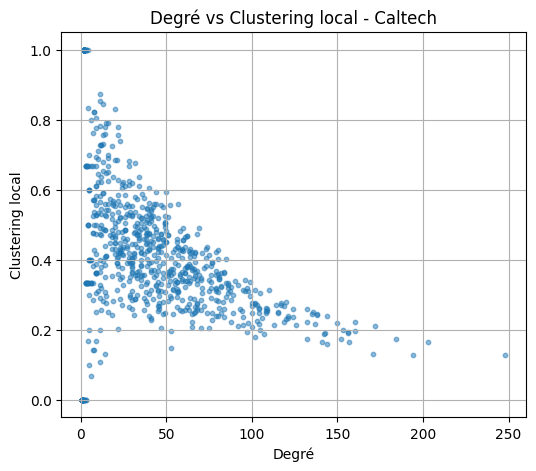

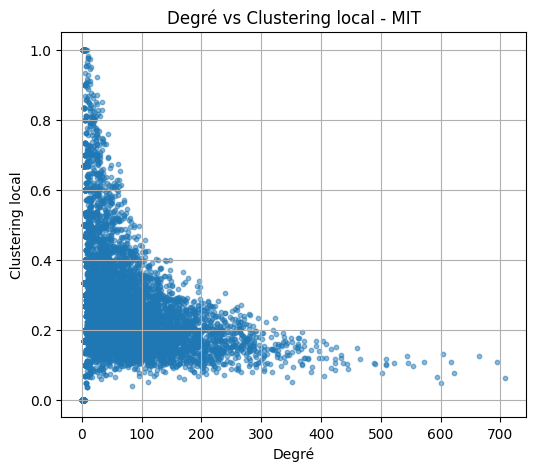

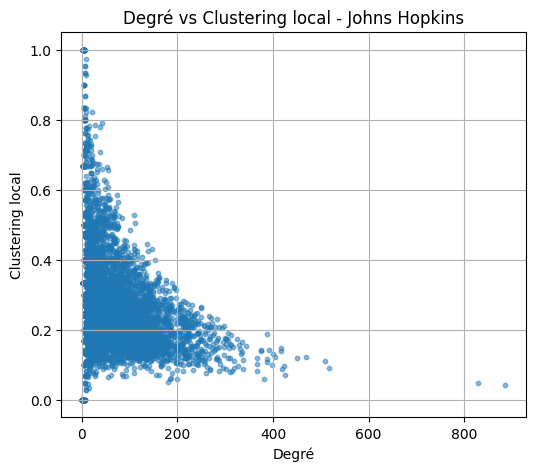

In [ ]:
# On trace les trois graphes
plot_degree_vs_clustering(G_caltech, "Caltech")
plot_degree_vs_clustering(G_mit, "MIT")
plot_degree_vs_clustering(G_jhu, "Johns Hopkins")


# Question 3



## Question 3.a



In [ ]:
# On liste les fichiers
data_dir = "/content/drive/MyDrive/fb100/data"
gml_files = [f for f in os.listdir(data_dir) if f.endswith(".gml")]

# On sélectionne juste 5 pour ne pas calculer pendant trop longtemps
selected_files = sorted(gml_files)[:50]


In [ ]:
# Fonction pour charger un graphe et calculer les assortativités
def compute_assortativities(file_path):
    G = nx.read_gml(file_path)
    G = nx.Graph(G)  # Assure-toi que c'est un graphe non orienté
    results = {}

    # Taille du réseau
    results["size"] = G.number_of_nodes()

    # Attributs catégoriels
    for attr in ["gender", "major_index", "dorm", "student_fac"]:
        try:
            assort = nx.attribute_assortativity_coefficient(G, attr)
        except Exception:
            assort = None
        results[attr] = assort

    # Assortativité par degré (pas un attribut)
    try:
        results["degree"] = nx.degree_assortativity_coefficient(G)
    except Exception:
        results["degree"] = None

    return results

In [ ]:
# On calcule les données
all_results = []
counter = 0
for file in selected_files:
    path = os.path.join(data_dir, file)
    counter =+ 1
    print('>>>', counter)
    print('>>> Computing for', file)
    result = compute_assortativities(path)
    result["university"] = file
    all_results.append(result)

# Affichage simple
for r in all_results:
    print(r)

>>> 1
>>> Computing for American75.gml
>>> 1
>>> Computing for Amherst41.gml
>>> 1
>>> Computing for Auburn71.gml
>>> 1
>>> Computing for BC17.gml
>>> 1
>>> Computing for BU10.gml
>>> 1
>>> Computing for Baylor93.gml
>>> 1
>>> Computing for Berkeley13.gml
>>> 1
>>> Computing for Bingham82.gml
>>> 1
>>> Computing for Bowdoin47.gml
>>> 1
>>> Computing for Brandeis99.gml
>>> 1
>>> Computing for Brown11.gml
>>> 1
>>> Computing for Bucknell39.gml
>>> 1
>>> Computing for Cal65.gml
>>> 1
>>> Computing for Caltech36.gml
>>> 1
>>> Computing for Carnegie49.gml
>>> 1
>>> Computing for Colgate88.gml
>>> 1
>>> Computing for Columbia2.gml
>>> 1
>>> Computing for Cornell5.gml
>>> 1
>>> Computing for Dartmouth6.gml
>>> 1
>>> Computing for Duke14.gml
>>> 1
>>> Computing for Emory27.gml
>>> 1
>>> Computing for FSU53.gml
>>> 1
>>> Computing for GWU54.gml
>>> 1
>>> Computing for Georgetown15.gml
>>> 1
>>> Computing for Hamilton46.gml
>>> 1
>>> Computing for Harvard1.gml
>>> 1
>>> Computing for Haverford76

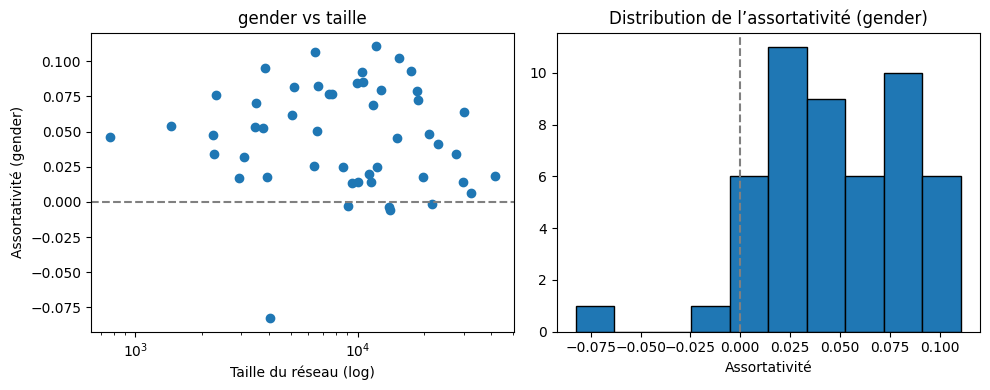

In [ ]:
# Une fonction pour plot les histogrames en fonction d'un attribut
def plot_results(results, attribute):
    sizes = [r["size"] for r in results]
    assort_values = [r[attribute] for r in results if r[attribute] is not None]

    # Scatter plot
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.scatter(sizes, assort_values)
    plt.xscale("log")
    plt.axhline(0, color="gray", linestyle="--")
    plt.xlabel("Taille du réseau (log)")
    plt.ylabel(f"Assortativité ({attribute})")
    plt.title(f"{attribute} vs taille")

    # Histogramme
    plt.subplot(1, 2, 2)
    plt.hist(assort_values, bins=10, edgecolor='black')
    plt.axvline(0, color="gray", linestyle="--")
    plt.title(f"Distribution de l’assortativité ({attribute})")
    plt.xlabel("Assortativité")
    plt.tight_layout()
    plt.show()

# On trace
plot_results(all_results, "gender")


# Question 4

## Question 4.b

In [ ]:
# La classes que l'on doit reprendre
class LinkPrediction(ABC):
    def __init__(self, graph):
        self.graph = graph
        self.N = len(graph)

    def neighbors(self, v):
        return list(self.graph.neighbors(v))

    @abstractmethod
    def fit(self):
        raise NotImplementedError("Fit must be implemented")


In [ ]:
# Le prédicteur Common Neighbors
class CommonNeighbors(LinkPrediction):
    def __init__(self, graph):
        super(CommonNeighbors, self).__init__(graph)
        self.scores = dict()  # stocker les scores

    def fit(self):
        for u in self.graph.nodes():
            for v in self.graph.nodes():
                if u >= v or self.graph.has_edge(u, v):
                    continue  # éviter les doublons et les arêtes existantes
                neighbors_u = set(self.neighbors(u))
                neighbors_v = set(self.neighbors(v))
                score = len(neighbors_u & neighbors_v)
                self.scores[(u, v)] = score


In [ ]:
# Le prédicteur Jaccard Coefficient
class Jaccard(LinkPrediction):
    def __init__(self, graph):
        super(Jaccard, self).__init__(graph)
        self.scores = dict()

    def fit(self):
        for u in self.graph.nodes():
            for v in self.graph.nodes():
                if u >= v or self.graph.has_edge(u, v):
                    continue
                neighbors_u = set(self.neighbors(u))
                neighbors_v = set(self.neighbors(v))
                inter = neighbors_u & neighbors_v
                union = neighbors_u | neighbors_v
                if len(union) > 0:
                    score = len(inter) / len(union)
                    self.scores[(u, v)] = score


In [ ]:
# Le prédicteur Adamic/Adar
import math

class AdamicAdar(LinkPrediction):
    def __init__(self, graph):
        super(AdamicAdar, self).__init__(graph)
        self.scores = dict()

    def fit(self):
        for u in self.graph.nodes():
            for v in self.graph.nodes():
                if u >= v or self.graph.has_edge(u, v):
                    continue
                neighbors_u = set(self.neighbors(u))
                neighbors_v = set(self.neighbors(v))
                common = neighbors_u & neighbors_v
                score = sum(1 / math.log(len(self.neighbors(w))) for w in common if len(self.neighbors(w)) > 1)
                self.scores[(u, v)] = score


## Question 4.c

In [ ]:
# On séléctionne un graphe, je prend ici Caltech36 car c'est le plus petit
G = nx.read_gml("/content/drive/MyDrive/fb100/data/Caltech36.gml")
G = nx.Graph(G)


In [ ]:
# Une fonction qui supprime une fraction des arêtes d'un graphe donné
def split_graph(G, fraction=0.1):
    edges = list(G.edges())
    num_to_remove = int(fraction * len(edges))
    removed_edges = random.sample(edges, num_to_remove)

    G_train = G.copy()
    G_train.remove_edges_from(removed_edges)

    return G_train, removed_edges

# On execute la fonction sur G
G_train = split_graph(G)[0]
removed_edges = split_graph(G)[1]

In [ ]:
# On instancie une instance de classe de chaque prédicteur
common_neighbors = CommonNeighbors(G_train)
common_neighbors.fit()
sorted_predictions_common_neighbors = sorted(common_neighbors.scores.items(), key=lambda x: x[1], reverse=True)


jaccard = Jaccard(G_train)
jaccard.fit()
sorted_predictions_jaccard = sorted(jaccard.scores.items(), key=lambda x: x[1], reverse=True)

adamic_adar = AdamicAdar(G_train)
adamic_adar.fit()
sorted_predictions_adamic_adar = sorted(adamic_adar.scores.items(), key=lambda x: x[1], reverse=True)



In [ ]:
# Une fonction  pour caculer les métriques
def evaluate_predictions(predictions, removed_edges, k_values):
    removed_set = set(map(frozenset, removed_edges))
    results = []

    for k in k_values:
        top_k = predictions[:k]
        predicted_edges = set(map(lambda x: frozenset(x[0]), top_k))
        tp = len(predicted_edges & removed_set)
        precision = tp / k
        recall = tp / len(removed_set)
        results.append((k, tp, precision, recall))

    return results


In [ ]:
k_values = [50, 100, 200, 300, 400]

# Execution de la fonction avec le prédicteur common_neighbors
metrics = evaluate_predictions(sorted_predictions_common_neighbors, removed_edges, k_values)
print('>>> Pour common_neighbors : \n')
for k, tp, precision, recall in metrics:
    print(f"Top@{k}: TP={tp}, Precision={precision:.3f}, Recall={recall:.3f}")

# Execution de la fonction avec le prédicteur jaccard
metrics = evaluate_predictions(sorted_predictions_jaccard, removed_edges, k_values)
print('>>> Pour jaccard : \n')
for k, tp, precision, recall in metrics:
    print(f"Top@{k}: TP={tp}, Precision={precision:.3f}, Recall={recall:.3f}")

# Execution de la fonction avec le prédicteur adamic_adar
metrics = evaluate_predictions(sorted_predictions_adamic_adar, removed_edges, k_values)
print('>>> Pour adamic_adar : \n')
for k, tp, precision, recall in metrics:
    print(f"Top@{k}: TP={tp}, Precision={precision:.3f}, Recall={recall:.3f}")


>>> Pour common_neighbors : 

Top@50: TP=7, Precision=0.140, Recall=0.004
Top@100: TP=9, Precision=0.090, Recall=0.005
Top@200: TP=13, Precision=0.065, Recall=0.008
Top@300: TP=15, Precision=0.050, Recall=0.009
Top@400: TP=16, Precision=0.040, Recall=0.010
>>> Pour jaccard : 

Top@50: TP=1, Precision=0.020, Recall=0.001
Top@100: TP=4, Precision=0.040, Recall=0.002
Top@200: TP=7, Precision=0.035, Recall=0.004
Top@300: TP=9, Precision=0.030, Recall=0.005
Top@400: TP=13, Precision=0.033, Recall=0.008
>>> Pour adamic_adar : 

Top@50: TP=7, Precision=0.140, Recall=0.004
Top@100: TP=8, Precision=0.080, Recall=0.005
Top@200: TP=14, Precision=0.070, Recall=0.008
Top@300: TP=15, Precision=0.050, Recall=0.009
Top@400: TP=17, Precision=0.043, Recall=0.010


## Question 4.d


In [ ]:
# On prend ici trois graphes
# gml_files = sorted([f for f in os.listdir(data_dir) if f.endswith(".gml")])
# selected_files = gml_files[:3]

selected_files = [
    'Caltech36.gml',
    'Reed98.gml',
    'Simmons81.gml'
]

In [ ]:
# On itère en répétant le code de la question 4.c
results_summary = []

for file in selected_files:
    print(f">>> Traitement du graphe {file}")
    G = nx.read_gml(os.path.join(data_dir, file))
    G = nx.Graph(G)

    # Étape 1 : suppression aléatoire des arêtes
    G_train, removed_edges = split_graph(G, fraction=0.1)

    # Étape 2 : tester chaque prédicteur
    for predictor_class in [CommonNeighbors, Jaccard, AdamicAdar]:
        print(f"Test du prédicteur {predictor_class.__name__}")
        predictor = predictor_class(G_train)
        predictor.fit()
        sorted_preds = sorted(predictor.scores.items(), key=lambda x: x[1], reverse=True)
        metrics = evaluate_predictions(sorted_preds, removed_edges, [100])  # k=100

        results_summary.append({
            "graph": file,
            "method": predictor_class.__name__,
            "k": 100,
            "tp": metrics[0][1],
            "precision": metrics[0][2],
            "recall": metrics[0][3]
        })

# On affiche le résultat
import pandas as pd

df = pd.DataFrame(results_summary)
print(df.sort_values(by=["graph", "method"]))


>>> Traitement du graphe Caltech36.gml
Test du prédicteur CommonNeighbors
Test du prédicteur Jaccard
Test du prédicteur AdamicAdar
>>> Traitement du graphe Reed98.gml
Test du prédicteur CommonNeighbors
Test du prédicteur Jaccard
Test du prédicteur AdamicAdar
>>> Traitement du graphe Simmons81.gml
Test du prédicteur CommonNeighbors
Test du prédicteur Jaccard
Test du prédicteur AdamicAdar
           graph           method    k  tp  precision    recall
2  Caltech36.gml       AdamicAdar  100  58       0.58  0.034835
0  Caltech36.gml  CommonNeighbors  100  58       0.58  0.034835
1  Caltech36.gml          Jaccard  100  38       0.38  0.022823
5     Reed98.gml       AdamicAdar  100  38       0.38  0.020202
3     Reed98.gml  CommonNeighbors  100  37       0.37  0.019670
4     Reed98.gml          Jaccard  100  32       0.32  0.017012
8  Simmons81.gml       AdamicAdar  100  60       0.60  0.018193
6  Simmons81.gml  CommonNeighbors  100  62       0.62  0.018799
7  Simmons81.gml          Jaccard 

# Question 5

## Question 5.b


In [ ]:
# On commence par implémenter Zhu et. al, l'algorithme de propagation de label

"""
Entrée
  G : Le graphe networkx contenant des labels connus et des labels manquants
  label : le label qu'on cherche à propager
  max_iter : le maximum d'iteration (pour connaître la précision)

Sortie
  label_pred : un dictionnaire qui associe les sommets du graphes aux labels
"""

def label_propagation (G, label, max_iter=200):

  #On initialise la liste des noeuds du graphe
  node_list=list(G.nodes())
  length=len(node_list)

  #On crée la matrice d'adjacence et la matrice diagonale normalisée des poids
  A = np.array(nx.adjacency_matrix(G, nodelist=node_list).todense(),dtype=float)
  D = np.diag(A.sum(axis=1))

  #On transforme les matrices en tensor
  a= torch.from_numpy(A)
  d_inv = torch.from_numpy(np.linalg.inv(D))

  #On crée le tensor qui va stocker les labels connus et labels trouvés
  y=torch.zeros((length,1), dtype=float)
  known = torch.zeros(length, dtype=float)

  #On fixe les noeuds dont connait déjà les labels
  for n, d in G.nodes(data=True):
    if label in d :
      index = int(n)
      y[index] = d[label]
      known[index] = True

  #On applique l'algorithme jusqu'à convergence (ou jusqu'à max_iter)
  for _ in range (max_iter):
    y_new = torch.matmul(d_inv@a, y) #Y <- D_inv.A.Y
    for k in range(len(known)):
      if (known[k]==True):
        y_new[k]=y[k]
    if torch.allclose(y_new, y, atol = 1e-5):
      break
    y=y_new

  label_pred={i: float(y[i][0]) for i in range(length)}

  return label_pred

## Question 5.c


In [ ]:
#On choisit un network du Facebook100 dataset
#Ici on choisit Caltech36 car c'est un réseau plus petit ce qui réduit le temps de calcul
G = nx.read_gml(os.path.join(data_dir, 'Caltech36.gml'))
G = nx.Graph(G)
n = G.number_of_nodes()

#On choisit au hasard 10%, 20%, 30% des noeuds du réseau grace à random.sample
random.seed(42);
names=['dix','vingt','trente']
percentages={}

for i in range(1,4):
  percentages[names[i-1]]= random.sample(sorted(G.nodes()),int(i*0.1*n))

#On retire les attributs suivants sur les noeuds choisis :
#   -”dorm”
#   -”major”
#   -”gender"
missing_attributes={}
labels= ['dorm', 'major_index', 'gender']
for name in percentages:
  new_G = nx.Graph(G)
  for label in labels :
    for sample in percentages[name] :
      del new_G.nodes[sample][label]
    missing_attributes[name,label]= new_G

#On utilise l'algorithme de label propagation pour retrouver les attributs manquants
completed_attributes ={}

for name in percentages:
  for label in labels :
    completed_attributes[name,label]=label_propagation(missing_attributes[name,label],label)

## Question 5.d

In [ ]:
#On définit les fonctions pour calculer la mean absolute error et l'accuracy

"""
Entrée
  y : Dictionnaire des noeuds et des labels initiaux (où on n'a rien retiré)
  y_bis : Dictionnaire des noeuds et des labels complétés par l'algorithme

Sortie
  mae/n : la mean absolute error
"""
def mae (y, y_bis) :
  n=len(y)
  mae = 0

  for i in y:
    mae+= abs(y[i]-y_bis[i])

  return mae/n


"""
Entrée
  y : Dictionnaire des noeuds et des labels initiaux (où on n'a rien retiré)
  y_bis : Dictionnaire des noeuds et des labels complétés par l'algorithme

Sortie
  acc/n : l'accuracy
"""
def accuracy_score(y, y_bis) :
  n = len(y)
  acc=0

  for i in y:
    if (int(y[i])==int(y_bis[i])):
      acc+=1

  return acc/n


In [ ]:
#On récupère les labels originaux sous la forme souhaitée (dictionnaire) pour comparer avec les résultats de l'algorithme
right_labels={}
for label in labels:
  dict = {}
  for node in sorted(G.nodes()):
    dict[int(node)]=float(G.nodes[node][label])
  right_labels[label] = dict

#On calcule la mea et l'accuracy pour toutes les simulations (pourcentages et labels)
d_mae={}
d_acc={}

for name in percentages:
  for label in labels :
    d_mae[name,label] = mae(right_labels[label], completed_attributes[name, label])
    d_acc[name,label] = accuracy_score (right_labels[label], completed_attributes[name, label])

In [ ]:
#On va afficher les résultats grâce à la bibliothèque tabulate
#On commence par créer les listes pour l'affichage
tab_mae=[]
tab_acc=[]

for i in range(3):
  frac_rmv = names[i]
  lab = labels[i]
  tab_mae.append([lab])
  tab_acc.append([lab])
  for j in range(3):
    lab=labels[j]
    tab_mae[i].append(d_mae[frac_rmv, lab])
    tab_acc[i].append(d_acc[frac_rmv, lab])

#On affiche les tableaux
print("Mean absolute error")
print(tabulate(tab_mae, headers=names))
print("\n\nAccuracy Score")
print(tabulate(tab_acc, headers=names))

Mean absolute error
                  dix     vingt     trente
-----------  --------  --------  ---------
dorm          4.74001   3.63661  0.0538237
major_index   8.35087   5.46699  0.105355
gender       13.3439   11.5734   0.177327


Accuracy Score
                  dix     vingt    trente
-----------  --------  --------  --------
dorm         0.903771  0.903771  0.945384
major_index  0.803641  0.804941  0.873862
gender       0.707412  0.715215  0.788036


# Question 6

##Question 6.b

In [ ]:
#On choisit un network du Facebook100 dataset
#On choisit à nouveau Caltech36
G = nx.read_gml(os.path.join(data_dir, 'Caltech36.gml'))
G = nx.Graph(G)
n = G.number_of_nodes()

#On choisit 20% des noeuds du réseau en suivant 3 scénarios différents
nb_rmv = int(0.2*n)
names=['randomly','high_degree','low_degree']
scenarios={}

#On commence en choisissant par hasard
random.seed(42);
scenarios[names[0]]=random.sample(sorted(G.nodes()),nb_rmv)

#Ensuite, on choisit les 20% des noeuds ayant le plus haut degré
high_d = sorted(G.degree(), key=lambda x:x[1])[:nb_rmv]
scenarios[names[1]]= [(high_d[i][0]) for i in range(nb_rmv)]

#Enfin les 20% des noeuds ayant le plus bas degré
low_d = sorted(G.degree(), key=lambda x:x[1], reverse=True)[:nb_rmv]
scenarios[names[2]]= [(low_d[i][0]) for i in range(nb_rmv)]

#On retire les attributs suivants sur les noeuds choisis :
#   -”dorm”
#   -”major”
#   -”gender"
scenarios_missing_attributes={}
labels= ['dorm', 'major_index', 'gender']
for name in names:
  new_G = nx.Graph(G)
  for label in labels :
    for sample in scenarios[name] :
      del new_G.nodes[sample][label]
    scenarios_missing_attributes[name,label]= new_G

#On utilise l'algorithme de label propagation pour retrouver les attributs manquants
completed_attributes ={}

for name in scenarios:
  for label in labels :
    completed_attributes[name,label]=label_propagation(scenarios_missing_attributes[name,label],label)

In [ ]:
#On récupère les labels originaux sous la forme souhaitée (dictionnaire) pour comparer avec les résultats de l'algorithme
right_labels={}
for label in labels:
  dict = {}
  for node in sorted(G.nodes()):
    dict[int(node)]=float(G.nodes[node][label])
  right_labels[label] = dict

#On calcule la mea et l'accuracy pour toutes les simulations (pourcentages et labels)
d_mae={}
d_acc={}

for name in scenarios:
  for label in labels :
    d_mae[name,label] = mae(right_labels[label], completed_attributes[name, label])
    d_acc[name,label] = accuracy_score (right_labels[label], completed_attributes[name, label])

In [ ]:
#On crée les listes pour l'affichage
tab_mae=[]
tab_acc=[]

for i in range(3):
  frac_rmv = names[i]
  lab = labels[i]
  tab_mae.append([lab])
  tab_acc.append([lab])
  for j in range(3):
    lab=labels[j]
    tab_mae[i].append(d_mae[frac_rmv, lab])
    tab_acc[i].append(d_acc[frac_rmv, lab])

#On affiche les tableaux
print("Mean absolute error")
print(tabulate(tab_mae, headers=scenarios))
print("\n\nAccuracy Score")
print(tabulate(tab_acc, headers=scenarios))

Mean absolute error
               randomly    high_degree    low_degree
-----------  ----------  -------------  ------------
dorm            4.74001        3.63661     0.0538237
major_index     8.35087        5.46699     0.105355
gender         13.3439        11.5734      0.177327


Accuracy Score
               randomly    high_degree    low_degree
-----------  ----------  -------------  ------------
dorm           0.903771       0.903771      0.945384
major_index    0.803641       0.804941      0.873862
gender         0.707412       0.715215      0.788036
